>#  HR Analysis

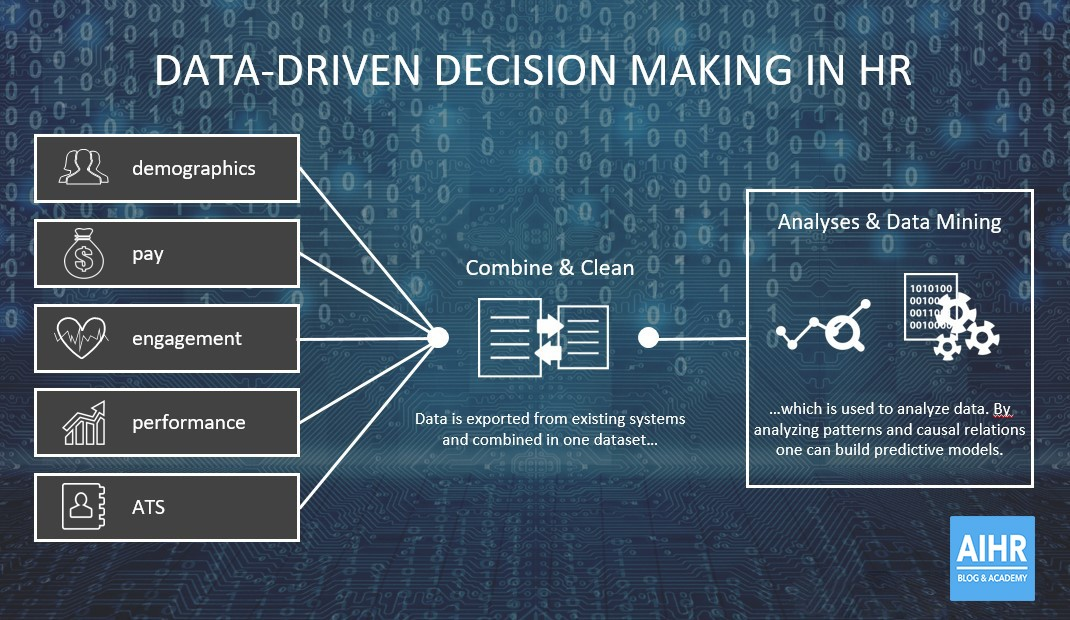

In [1]:
from IPython.display import Image
import os
Image("../input/hr-analytics-pic/HR analytics1.jpg")

## Introduction:
   ###           HR analytics is the process of collecting and analyzing Human Resource ( HR ) data in order   to improve an organization's workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics.
## We are going to find out why people are quitting the jobs?.
### The most commont reason of leaving is Every employee has high salary expectations and this is one of the major reason, why an employee quits the organization. Retention becomes a problem when an employee quotes for an exceptionally high salary, which is beyond the budget of the organization.
## Steps we are going to perform:
1. Find the Correlation between columns.
1. Plot those columns first which more correleated together.
1. Find the reason of why employees are quitting.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from plotly.subplots import make_subplots

In [3]:
df=pd.read_csv("../input/hr-analytics-case-study/general_data.csv")
employeesurvey=pd.read_csv("../input/hr-analytics-case-study/employee_survey_data.csv")
managersurvey=pd.read_csv("../input/hr-analytics-case-study/manager_survey_data.csv")
Intime=pd.read_csv("../input/hr-analytics-case-study/in_time.csv")
Outtime=pd.read_csv("../input/hr-analytics-case-study/out_time.csv")
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
dfe=df.copy()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dfe["Attrition"]=labelencoder.fit_transform(df["Attrition"])

In [5]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
df.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(["StandardHours","EmployeeCount"],axis=1,inplace=True)

In [8]:
mask = np.zeros_like(df.corr())
triangle_indeces=np.triu_indices_from(mask)
mask[triangle_indeces] =True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

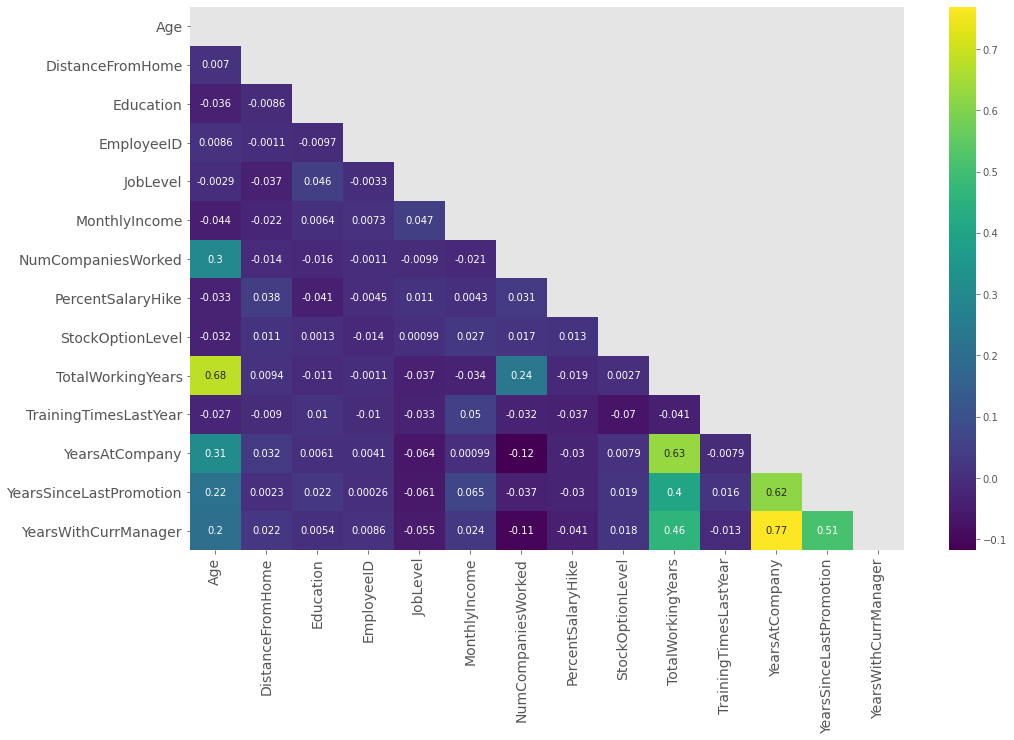

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=mask,annot=True,annot_kws={"size":10},cmap="viridis")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### There are following correlations:
* Age with TotalWorkingYears (0.68)
* YearsAtCompany with YearsWithCurrManager (0.77)
* YearsAtCompany with YearsSinceLastPromotion (0.62)
* TotalWorkingYears with YearsAtCompany (0.63)


<AxesSubplot:title={'center':'Correlation of Different columns with Attrition column'}>

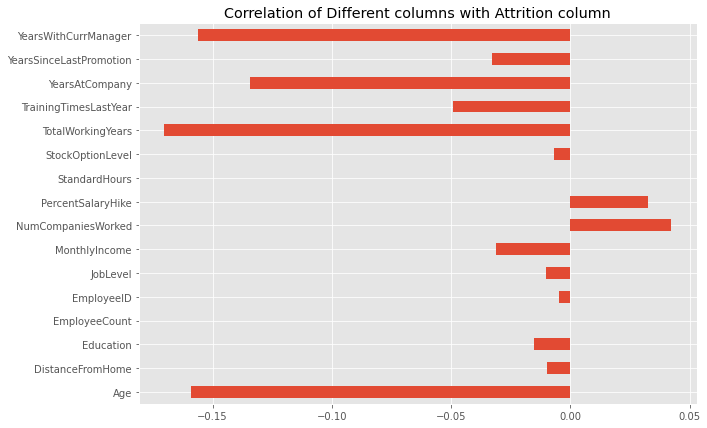

In [10]:
dfe.drop("Attrition",axis=1).corrwith(dfe["Attrition"]).plot(kind="barh", figsize=(10, 7),title="Correlation of Different columns with Attrition column")

#### Results:
* Attrition is highly corrlelated with TotalWorkingYears, Age, YearsWithCurrManager,YearsAtCompany. 
* TotalWorkingYears is correlated with YearsAtCompany , YearsWithCurrManager ,YearsSinceLastPromotion.
* Age is correlated with TotalWorkingYears ,YearsAtCompany.
* YearsAtCompany is correlated with YearsWithCurrManager,YearsSinceLastPromotion. 
#### Most important columns of this dataset is:
 1. Attrition.
 1. TotalWorkingYears.
 1. Age.
 1. YearsWithCurrManager.
 1. YearsAtCompany.
 1. YearsSinceLastPromotion


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Which gender left the most')

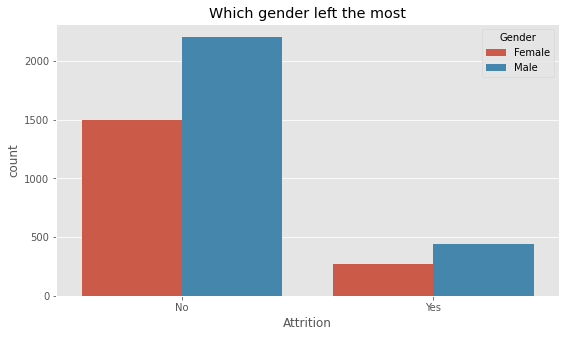

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(df["Attrition"],hue=df["Gender"])
sns.set_style("whitegrid")
plt.title("Which gender left the most")

#### Results:
* Male has most no and yes attrition then female

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Attritions by Education level')

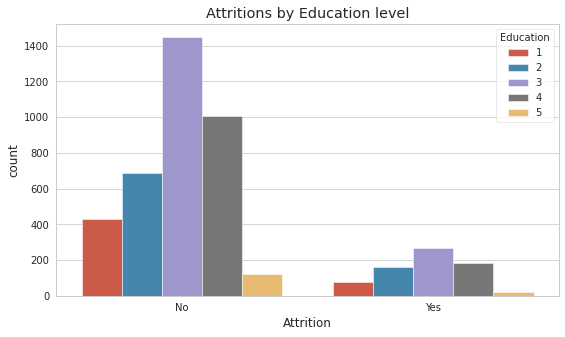

In [12]:
plt.figure(figsize=(9,5))
sns.countplot(df["Attrition"],hue=df["Education"])
plt.title("Attritions by Education level")

#### Results:
* those people left the jobs who has education level is 3
* Most  of the people have education level is 3

In [13]:
df["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [14]:
temp=dfe.groupby("Department")["Attrition"].sum().reset_index()
temp2=dfe.groupby("BusinessTravel")["Attrition"].sum().reset_index()
temp3=dfe.groupby("EducationField")["Attrition"].sum().reset_index()
temp4=dfe.groupby("NumCompaniesWorked")[["Attrition"]].sum().reset_index()
temp3.head(3)

,EducationField,Attrition
0,Human Resources,33
1,Life Sciences,303
2,Marketing,75


In [15]:
fig_d=px.bar(temp,x='Department',y='Attrition')
fig_bt=px.bar(temp2,x='BusinessTravel',y='Attrition')
fig_ef=px.bar(temp3,x='EducationField',y='Attrition')
fig_ncw=px.bar(temp4,x='NumCompaniesWorked',y='Attrition')
        
fig=make_subplots(rows=2,cols=2,shared_xaxes=False,horizontal_spacing=0.1,vertical_spacing=.2,
                 subplot_titles=("Left ratio with  Departments column","Left ratio with BusinessTravel column","Left ratio with EducationField column",
                                "Left ratio by NumCompaniesWorked column"))
fig.add_trace(fig_d['data'][0],row =1 ,col =1)
fig.add_trace(fig_bt['data'][0],row =1,col=2)
fig.add_trace(fig_ef['data'][0],row =2,col=1)
fig.add_trace(fig_ncw['data'][0],row =2,col=2)
fig.update_layout(height = 1000)
fig.show()

#### Results:
* People who were in  **Research and Development** Department  most *left* the jobs.
* People who **travels rarely** are most *left* the jobs.
* People who has education in **life sciences** are most *left* the jobs.
* People who worked with **1 company** are most *left* the jobs.

In [16]:
dfe.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [17]:
temp1=dfe.groupby("Age")[["Attrition"]].sum().reset_index()
temp1.head(3)

,Age,Attrition
0,18,12
1,19,18
2,20,18


In [18]:
fig = px.line(temp1,x="Age",y="Attrition",height=600,
             title="Which Age group person most left the job")
fig.show()

#### Result:
*  People who have ages between  **29** to **31** have most *left* the jobs

In [19]:
temp=dfe.groupby("DistanceFromHome")[["Attrition"]].sum().reset_index()
temp.head()

,DistanceFromHome,Attrition
0,1,96
1,2,114
2,3,30
3,4,33
4,5,30


In [20]:
fig = px.line(temp,x="DistanceFromHome",y="Attrition",height=600,
             title="Left ratio with column DistanceFromHome column")
fig.show()

#### Result:
* People whch have **1km** to **2km** away home from office are most *left* the jobs

In [21]:
 temp=dfe.groupby("TotalWorkingYears")[["Attrition"]].sum().reset_index()
temp.head()

,TotalWorkingYears,Attrition
0,0.0,15
1,1.0,119
2,2.0,27
3,3.0,27
4,4.0,36


In [22]:
fig = px.line(temp,x="TotalWorkingYears",y="Attrition",height=600,
             title="Left ratio with column TotalWorkingYears ")
fig.show()

#### Results:
* Mostly those people are leaving who have been working for only 1 years

In [23]:
temp=dfe.groupby("YearsAtCompany")[["Attrition"]].sum().reset_index()
temp.head()

,YearsAtCompany,Attrition
0,0,48
1,1,177
2,2,81
3,3,60
4,4,57


In [24]:
fig = px.line(temp,x="YearsAtCompany",y="Attrition",height=600,
             title="Left ratio with column YearsAtCompany ")
fig.show()

#### Results:
* This graph shows that new comers are leaving

In [25]:
 temp=dfe.groupby("PercentSalaryHike")[["Attrition"]].sum().reset_index()
temp.head()

,PercentSalaryHike,Attrition
0,11,90
1,12,90
2,13,102
3,14,87
4,15,63


In [26]:
fig = px.line(temp,x="PercentSalaryHike",y="Attrition",height=600,
             title="Left ratio with column PercentSalaryHike ")
fig.show()

#### Result:
* persons which has PercentSalaryHike between 11 to 13 are leaving
#### Reason: 
  * may be they are not satisfied with their salary

In [27]:
 temp=dfe.groupby("YearsSinceLastPromotion")[["Attrition"]].sum().reset_index()
temp.head()

,YearsSinceLastPromotion,Attrition
0,0,330
1,1,147
2,2,81
3,3,27
4,4,15


In [28]:
fig = px.line(temp,x="YearsSinceLastPromotion",y="Attrition",height=600,
             title="Left ratio with column YearsSinceLastPromotion ")
fig.show()

#### Results:
* Those who didn't get promotion are leaving most

In [29]:
employeesurvey.head(3)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


In [30]:
dfp=pd.concat([dfe,employeesurvey],axis=1)
df1= dfp.loc[:,~dfp.columns.duplicated()]
df1.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0


In [31]:
temp_es=df1.groupby("EnvironmentSatisfaction")[["Attrition"]].sum().reset_index()
temp_js=df1.groupby("JobSatisfaction")[["Attrition"]].sum().reset_index()
temp_ycm=df1.groupby("YearsWithCurrManager")[["Attrition"]].sum().reset_index()
temp_ycm.head(3)

,YearsWithCurrManager,Attrition
0,0,255
1,1,33
2,2,150


In [32]:
fig_es=px.bar(temp_es,x='EnvironmentSatisfaction',y='Attrition')
fig_js=px.bar(temp_js,x='JobSatisfaction',y='Attrition')
fig_ym=px.bar(temp_ycm,x='YearsWithCurrManager',y='Attrition')
fig=make_subplots(rows=2,cols=2,shared_xaxes=False,horizontal_spacing=0.1,vertical_spacing=.2,
              subplot_titles=("FIG1:Left ratio by EnvironmentSatisfaction","FIG2:Left ratio by JobSatisfaction",
                    "FIG3:Left ratio by YearsWithCurrManager"))
fig['layout']['xaxis']['title']='EnvironmentSatisfaction'
fig['layout']['xaxis2']['title']='JobSatisfaction'
fig['layout']['xaxis3']['title']='YearsWithCurrManager'
fig['layout']['yaxis']['title']='Attrition'
fig['layout']['yaxis2']['title']='Attrition'
fig['layout']['yaxis3']['title']='Attrition'

fig.add_trace(fig_es['data'][0],row =1 ,col =1)
fig.add_trace(fig_js['data'][0],row =1,col=2)
fig.add_trace(fig_ym['data'][0],row =2,col=1)
fig.update_layout(height = 1000)
fig.update_layout(width = 900)

fig.show()

### These bar plots show the following results:
* FIG1:The people who have  Work Environment Satisfaction Level is **low(1)** are most *left* the jobs.
* FIG2:The people who have  Job Satisfaction Level is **3** are most *left* the jobs.
* FIG3:The people who have spent **least** year with manager are *left* the jobs most


# Conclusion:
### Those who are quitting jobs mostly are not satidfied by environment ,Salary ,Department,promotion ,company and with job.